# REQUIRED

## Problem 1

In [2]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sts

# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('call_center.csv')

# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour

for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

In [131]:
call_data = {
    'hour_13': {
        'num_calls': len(waiting_times_per_hour[13]), # number of calls for hour 13
        'alpha': 1, # fixed prior parameter
        'beta': 0.25, # fixed prior parameter
        'call_time': waiting_times_per_hour[13] # all calls for hour 13
        }
    }

In [132]:
stan_code = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.
data {
    int<lower=0> num_calls; // number of calls
    real<lower=0> call_time[num_calls];  // lengths of the calls
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.

parameters {
    real<lower=0> lambda_;  // number of calls per minute
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    lambda_ ~ gamma(alpha, beta);  // prior over lambda
    for(i in 1:num_calls) {
        call_time[i] ~ exponential(lambda_);  // likelihood function
    }
}

"""

In [133]:
# compile model
stan_model = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4ef4ead80a3a572f7bfd621b9f1222c5 NOW.


In [134]:
# generate posterior samples
results_13 = stan_model.sampling(data=call_data['hour_13'])

In [135]:
# print Stan summary of parameter posteriors
print('\nHour 13 results:\n')
print(results_13.stansummary(pars=['lambda_'], probs=[0.01, 0.99]))


Hour 13 results:

Inference for Stan model: anon_model_4ef4ead80a3a572f7bfd621b9f1222c5.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd     1%    99%  n_eff   Rhat
lambda_   6.35  8.5e-3   0.33   5.62   7.14   1465    1.0

Samples were drawn using NUTS at Tue Oct 15 21:49:03 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


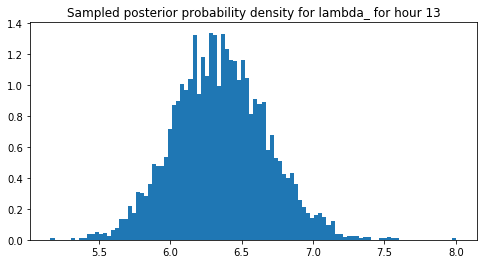

Posterior 98% interval over lambda_ for hour 13: [5.62450259 7.13643597]


In [136]:
# Plot posterior histograms
samples_13 = results_13.extract()

plt.figure(figsize=(8,4))
plt.hist(samples_13['lambda_'], bins=100, density=True)
plt.title('Sampled posterior probability density for lambda_ for hour 13')
plt.show()

print('Posterior 98% interval over lambda_ for hour 13:', np.percentile(samples_13['lambda_'], [1, 99]))

## Problem 2

In [137]:
data2 = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

x_data = {
        'mu': 0, # fixed prior parameter
        'nu': 0.054, # fixed prior parameter
        'alpha': 1.12,   # fixed prior parameter
        'beta': 0.4, # fixed prior parameter
        'data_size': len(data2), # data size
        'dataa': data2 # the data itself
        }

In [138]:
stan_code_2 = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.

data {
    real mu; // prior parameter
    real<lower=0> nu; // prior parameter
    int<lower=0> data_size; // data size
    real dataa[data_size];  // each datum in the dataset
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.

parameters {
    real x;  // mean of the population
    real<lower=0> sigma2; // variance of the population
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    sigma2 ~ inv_gamma(alpha, beta);  // inverse gamma over variance (for prior)
    x ~ normal(mu,sqrt(sigma2 / nu)); // normal distribution over mean (for prior)
    for(i in 1:data_size) {
        dataa[i] ~ normal(x, sqrt(sigma2));  // likelihood function
    }
}

"""

In [139]:
# compile model
stan_model_2 = pystan.StanModel(model_code=stan_code_2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_88757552725b938921b1bcb8ec605a80 NOW.


In [140]:
# generate posterior samples
results_2 = stan_model_2.sampling(data=x_data)
# posterior summary
print(results_2.stansummary(pars=['x', 'sigma2'], probs=[0.025, 0.975]))

Inference for Stan model: anon_model_88757552725b938921b1bcb8ec605a80.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
x        3.06  2.5e-3   0.14    2.8   3.33   3055    1.0
sigma2   3.62  6.7e-3   0.36   2.98   4.39   2925    1.0

Samples were drawn using NUTS at Tue Oct 15 21:49:55 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


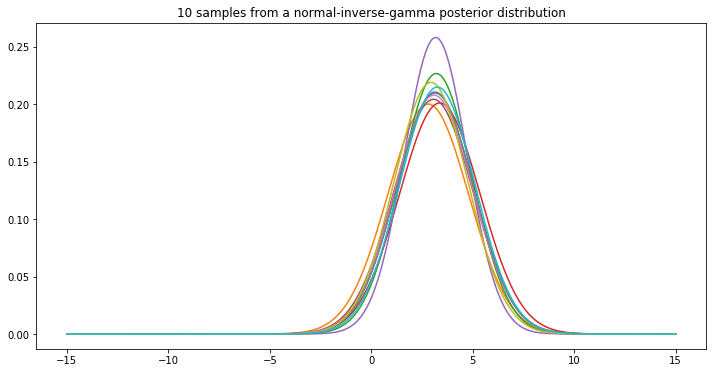

95% prior confidence intervals:
x: [2.802, 3.334]
σ²: [2.984, 4.391]


In [141]:
num_sample = 10
# get 4000 samples
samples_2 = results_2.extract()
# get 10 random samples out of 4000 samples
ran_ind = np.random.choice(range(4000), num_sample, replace=False)
sample_mean = samples_2['x'][ran_ind]
sample_var = samples_2['sigma2'][ran_ind]
# set up the plot
plt.figure(figsize=(12,6))
plt.title('%i samples from a normal-inverse-gamma posterior distribution' % num_sample)
plot_x = np.linspace(-15, 15, 500)
for i in range(num_sample):
    # plot the distribution given the sampled mean and variance from the posterior
    plt.plot(plot_x, sts.norm.pdf(plot_x, sample_mean[i], np.sqrt(sample_var[i])))
plt.show()

# print out the summary
print('95% prior confidence intervals:')
print('x: [%.3f, %.3f]' % (
    np.percentile(samples_2['x'], 2.5),
    np.percentile(samples_2['x'], 97.5)))
print('σ²: [%.3f, %.3f]' % (
    np.percentile(samples_2['sigma2'], 2.5),
    np.percentile(samples_2['sigma2'], 97.5)))

## Problem 3

In [142]:
# load the data
data_3 = np.loadtxt('hrtem.csv')
# log-transform the data
log_data = np.log(data_3)

In [143]:
loggie_data = {
        'mu': 2.3, # prior parameter
        'nu': 0.1,  # prior parameter
        'alpha': 2,   # prior parameter
        'beta': 5, # prior parameter
        'data_size': len(log_data), # data size
        'dataa': log_data # log-transformed data
        }

In [144]:
stan_code_3 = """

// The data block contains all known quantities - typically the observed
// data and any constant hyperparameters.

data {
    real mu; // prior parameter
    real<lower=0> nu; // prior parameter
    int<lower=0> data_size; // data size
    real dataa[data_size];  // each datum in the dataset
    real<lower=0> alpha;  // fixed prior hyperparameter
    real<lower=0> beta;   // fixed prior hyperparameter
}

// The parameters block contains all unknown quantities - typically the
// parameters of the model. Stan will generate samples from the posterior
// distributions over all parameters.

parameters {
    real x;  // mean of the population
    real<lower=0> sigma2; // variance of the population
}

// The model block contains all probability distributions in the model.
// This of this as specifying the generative model for the scenario.
model {
    sigma2 ~ inv_gamma(alpha, beta);  // inverse gamma over variance (for prior)
    x ~ normal(mu, sqrt(sigma2 / nu)); // normal distribution over mean (for prior)
    for(i in 1:data_size) {
        dataa[i] ~ normal(x, sqrt(sigma2));  // likelihood function
    }
}

"""

In [145]:
# compile model
stan_model_3 = pystan.StanModel(model_code=stan_code_3)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_88757552725b938921b1bcb8ec605a80 NOW.


In [146]:
# generate posterior samples
results_3 = stan_model_3.sampling(data=loggie_data)
# summary of posterior
print(results_3.stansummary(pars=['x', 'sigma2'], probs=[0.025, 0.975]))

Inference for Stan model: anon_model_88757552725b938921b1bcb8ec605a80.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
x        1.89  5.4e-4   0.03   1.83   1.96   3480    1.0
sigma2    0.5  5.4e-4   0.03   0.44   0.56   3407    1.0

Samples were drawn using NUTS at Tue Oct 15 21:50:48 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


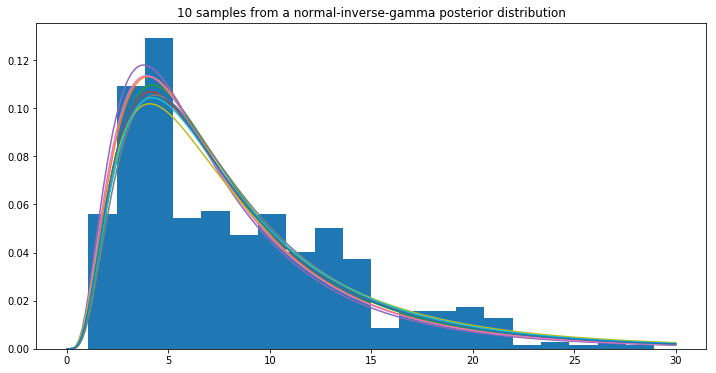

95% prior confidence intervals:
x: [1.831, 1.957]
σ²: [0.440, 0.562]


In [147]:
num_sample_3 = 10
# get 4000 posterior samples
samples_3 = results_3.extract()
# get 10 random samples from 4000 samples
ran_ind_3 = np.random.choice(range(4000), num_sample_3, replace=False)
sample_mean_3 = samples_3['x'][ran_ind_3]
sample_var_3 = samples_3['sigma2'][ran_ind_3]
# set up the plot
plt.figure(figsize=(12,6))
plt.hist(data_3, bins=20, density=True)
plt.title('%i samples from a normal-inverse-gamma posterior distribution' % num_sample_3)
plot_x = np.linspace(0, 30, 200)
for i in range(num_sample):
    # plot the log-normal distribution given mean and variance drawn from the posterior distribution
    plt.plot(plot_x, sts.lognorm.pdf(plot_x, np.sqrt(sample_var_3[i]), scale=np.exp(sample_mean_3[i])))
plt.show()
# print out the summary
print('95% prior confidence intervals:')
print('x: [%.3f, %.3f]' % (
    np.percentile(samples_3['x'], 2.5),
    np.percentile(samples_3['x'], 97.5)))
print('σ²: [%.3f, %.3f]' % (
    np.percentile(samples_3['sigma2'], 2.5),
    np.percentile(samples_3['sigma2'], 97.5)))

# STRETCH GOAL

In [33]:
data_set = np.loadtxt('hrtem.csv') # load the dataset
log_dataset = np.log(data_set) # transform the data to its log

In [129]:
data_log = {
    'log_data': log_dataset, # log of the data
    'data_size': len(log_dataset), # size of the data set
    # all the fixed prior parameters
    'alpha_0': 1,
    'beta_0': 1,
    'alpha_1': 2,
    'beta_1': 1,
    'alpha_2': 2,
    'beta_2': 3,
    'sigma_1': 1,
    'sigma_2': 0.5,
    'mu_1': 0,
    'mu_2': 2
}

In [121]:
stan_code_4 = """

functions {
    // define a function for the likelihood
    real two_normal_lpdf(real y, real p, real x_1, real x_2, real sigma2_1, real sigma2_2) {
        return p*normal_lpdf(y | x_1, sqrt(sigma2_1)) + (1-p)*normal_lpdf(y | x_2, sqrt(sigma2_2));
    }
}
data {
    // all the known quantities (prior parameters, data)
    int<lower=0> data_size;
    real log_data[data_size];
    real<lower=0> alpha_0;
    real<lower=0> beta_0;
    real<lower=0> alpha_1;
    real<lower=0> beta_1;
    real<lower=0> alpha_2;
    real<lower=0> beta_2;
    real<lower=0> sigma_1;
    real<lower=0> sigma_2;
    real mu_1;
    real mu_2;
    
}

parameters {
    // all the unknown quantities
    real<lower=0, upper=1> p;
    real x_1;
    real x_2;
    real<lower=0> sigma2_1;
    real<lower=0> sigma2_2;
}

model {
    // assuming that the parameters are independent of each other, hence P(p, x_1, x_2, sigma2_1, sigma2_2) = P(p)*P(x_1)*P(x_2)*P(sigma2_1)*P(sigma2_2)
    p ~ inv_gamma(alpha_0, beta_0); // prior distribution for p
    sigma2_1 ~ gamma(alpha_1, beta_1);  // prior distribution for variance of first normal distribution
    x_1 ~ normal(mu_1, sigma_1); // prior distribution for mean of first normal distribution
    sigma2_2 ~ gamma(alpha_2, beta_2);  // prior distribution for variance of second normal distribution
    x_2 ~ normal(mu_2, sigma_2); // prior distribution for mean of second normal distribution
    // likelihood function
    for(i in 1:data_size) {
        log_data[i] ~ two_normal(p, x_1, x_2, sigma2_1, sigma2_2);
    }
}
"""

In [122]:
stan_model_4 = pystan.StanModel(model_code=stan_code_4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e5b7de4fdca5cd2ea4cf8d30098c5a3d NOW.


In [130]:
# generate posterior samples
results_4 = stan_model_4.sampling(data=data_log)
# summary of posterior
print(results_4.stansummary(pars=['p', 'x_1', 'x_2', 'sigma2_1', 'sigma2_2'], probs=[0.025, 0.975]))

Inference for Stan model: anon_model_e5b7de4fdca5cd2ea4cf8d30098c5a3d.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%  97.5%  n_eff   Rhat
p          0.77 10.0e-3   0.25   0.24    1.0    602   1.01
x_1        1.89  1.0e-3   0.04   1.82   1.96   1398    1.0
x_2        1.92  4.9e-3   0.19   1.55    2.4   1510   1.01
sigma2_1   0.49  1.0e-3   0.04   0.42   0.57   1546    1.0
sigma2_2   0.55  6.5e-3   0.23   0.28   1.21   1222    1.0

Samples were drawn using NUTS at Sat Oct 19 14:44:56 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [131]:
num_sample_4 = 10
# get 4000 posterior samples
samples_4 = results_4.extract()
# get 10 random samples from 4000 samples
ran_ind_4 = np.random.choice(range(4000), num_sample_4, replace=False)
sample_mean_1 = samples_4['x_1'][ran_ind_4]
sample_var_1 = samples_4['sigma2_1'][ran_ind_4]
sample_mean_2 = samples_4['x_2'][ran_ind_4]
sample_var_2 = samples_4['sigma2_2'][ran_ind_4]
sample_p = samples_4['p'][ran_ind_4]

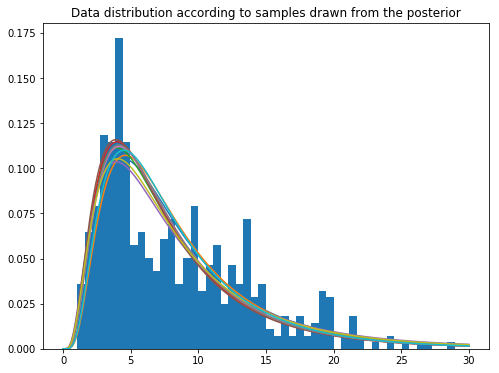

In [132]:
x = np.linspace(0, 30, 200)
plt.figure(figsize=(8,6))
plt.title('Data distribution according to samples drawn from the posterior')
for i in range(num_sample_4):
    if np.random.random() < sample_p[i]:
        plt.plot(x, sts.lognorm.pdf(x, np.sqrt(sample_var_1[i]), scale=np.exp(sample_mean_1[i])))
    else:
        plt.plot(x, sts.lognorm.pdf(x, np.sqrt(sample_var_2[i]), scale=np.exp(sample_mean_2[i])))
plt.hist(data_set, bins=50, density=True)
plt.show()